In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei'] 

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


由标题我们可以看到 channel 与 region 对销售数据没有什么关系，将这两个列删除掉

In [6]:
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


我们可以看到，数据集包含了6个数据类型，代表了不同的商品

['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

建立无监督聚类模型

将 Milk 和 Groceries 两个特征进行聚类，并将聚类结果可视化，以获取直观的输 出。

In [7]:
mg = data[['Milk','Grocery']]
mg.head()

,Milk,Grocery
0,9656,7561
1,9810,9568
2,8808,7684
3,1196,4221
4,5410,7198


首先使用kmeans算法对数据进行聚类

In [8]:
from sklearn.cluster import KMeans

In [9]:
mg['kmeans_label'] = KMeans(n_clusters=5, random_state=0).fit_predict(mg)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
mg.head(20)

,Milk,Grocery,kmeans_label
0,9656,7561,4
1,9810,9568,4
2,8808,7684,4
3,1196,4221,0
4,5410,7198,0
5,8259,5126,0
6,3199,6975,0
7,4956,9426,4
8,3648,6192,0
9,11093,18881,4


In [11]:
# 查看每一类有多少数量
mg.groupby('kmeans_label').size()

kmeans_label
0    281
1     37
2      3
3      2
4    117
dtype: int64

In [12]:
# 尝试一下聚类成为两类
mg['kmeans_label'] = KMeans(n_clusters=2, random_state=0).fit_predict(mg)

# 查看每一类有多少数量
mg.groupby('kmeans_label').size()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


kmeans_label
0    387
1     53
dtype: int64

In [13]:
# 导入函数
from sklearn.metrics import silhouette_score

In [14]:
mg = data[['Milk','Grocery']]
# 获得聚类标签
label = KMeans(n_clusters=2, random_state=0).fit_predict(mg)

# 计算轮廓系数
silhouette_score(mg, label, random_state=0)

0.6961488782412818

In [15]:
mg = data[['Milk','Grocery']]
# 创建空列表 
scores = []

# 使用for循环
for k in range(2, 10):
    labels = KMeans(n_clusters=k, random_state=0).fit_predict(mg)
    score = silhouette_score(mg, label, random_state=0)
    scores.append(score)
    
print(scores)

[0.6961488782412818, 0.6961488782412818, 0.6961488782412818, 0.6961488782412818, 0.6961488782412818, 0.6961488782412818, 0.6961488782412818, 0.6961488782412818]


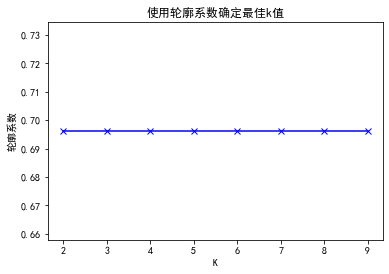

In [16]:
x = range(2, 10)
y = scores

plt.plot(x, y, 'bx-')

plt.title('使用轮廓系数确定最佳k值')
plt.xlabel('K')
plt.ylabel('轮廓系数')
plt.show()

这里出现了所有类别结果都一样的情况，尝试将数据归一化，把数据压缩到一个特定的区间以后，再试一下聚类的结果

使用sklearn.preprocessing.scale()函数，可以直接将给定数据进行标准化。

In [17]:
from sklearn import preprocessing

In [18]:
mg_scaler = preprocessing.StandardScaler().fit(mg)
mg_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
mg_scalerd = mg_scaler.transform(mg)

In [20]:
# 创建空列表 
scores = []

# 使用for循环
for k in range(2, 10):
    labels = KMeans(n_clusters=k, random_state=0).fit_predict(mg)
    score = silhouette_score(mg_scalerd, label, random_state=0)
    scores.append(score)
    
print(scores)

[0.6927749021742704, 0.6927749021742704, 0.6927749021742704, 0.6927749021742704, 0.6927749021742704, 0.6927749021742704, 0.6927749021742704, 0.6927749021742704]


In [21]:
mg_min_max_scaler = preprocessing.MinMaxScaler().fit_transform(mg)
# mg_min_max_scaler

In [22]:
# 创建空列表 
scores = []

# 使用for循环
for k in range(2, 10):
    labels = KMeans(n_clusters=k, random_state=0).fit_predict(mg)
    score = silhouette_score(mg_min_max_scaler, label, random_state=0)
    scores.append(score)
    
print(scores)

[0.6930593318152948, 0.6930593318152948, 0.6930593318152948, 0.6930593318152948, 0.6930593318152948, 0.6930593318152948, 0.6930593318152948, 0.6930593318152948]


通过归一化以后，也出现了得分相同的情况，可能是数据集不太适合使用kmeans进行聚类

引入MeanShift聚类方法，对数据进行聚类操作

In [23]:
# 均值偏移 -------------------------------------------------------------------------------------------------------------
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(mg_min_max_scaler, quantile=0.2, n_samples=50)  # 带宽（分位点、样本数）
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(mg_min_max_scaler)
# 聚类标签
labels = ms.labels_
# 簇的中心
centers = ms.cluster_centers_
print(centers)
# 聚类评估 ---------------------------------------------------------------------------------------------------------
from sklearn import metrics
score = metrics.silhouette_score(mg_min_max_scaler, labels)
print('聚类得分是：%.2f' % score)


[[0.03027236 0.03323804]
 [0.14915795 0.20112166]
 [0.31472707 0.18258836]
 [0.23123375 0.15039827]
 [0.22587245 0.04584649]
 [0.2894535  0.27449332]
 [0.34377    0.35361135]
 [1.         0.34610949]
 [0.73804175 0.59894155]
 [0.62826954 1.        ]
 [0.59767439 0.21737068]
 [0.52168348 0.6423467 ]
 [0.49518674 0.23730019]
 [0.40626064 0.28954374]
 [0.38493798 0.42781077]
 [0.2846289  0.4939263 ]
 [0.22526313 0.39323324]
 [0.11340768 0.3749744 ]
 [0.06705881 0.72534141]]
聚类得分是：0.49


使用轮廓系数衡量分类数量，确定聚类结果

In [24]:
mg = data[['Milk','Grocery']]


In [25]:
# 创建空列表 
scores = []

# 使用for循环
for k in range(50, 120, 10):
    bandwidth = estimate_bandwidth(mg_min_max_scaler, quantile=0.2, n_samples=k)  # 带宽（分位点、样本数）
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(mg_min_max_scaler)
    # 聚类标签
    labels = ms.labels_
    # 簇的中心
    centers = ms.cluster_centers_
#     print(centers)
    # 聚类评估 ---------------------------------------------------------------------------------------------------------
    score = metrics.silhouette_score(mg_min_max_scaler, labels)
    scores.append(score)


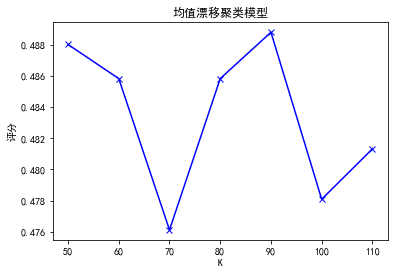

In [26]:
x = range(50, 120, 10)
y = scores

plt.plot(x, y, 'bx-')

plt.title('均值漂移聚类模型')
plt.xlabel('K')
plt.ylabel('评分')
plt.show()

可以看到，将数据划分为90类，得到的评分是最好的。

将数据分为90类

In [27]:
bandwidth = estimate_bandwidth(mg_min_max_scaler, quantile=0.2, n_samples=90)  # 带宽（分位点、样本数）
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(mg_min_max_scaler)
# 聚类标签
mg['labels'] = ms.labels_
mg

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Milk,Grocery,labels
0,9656,7561,4
1,9810,9568,1
2,8808,7684,0
3,1196,4221,0
4,5410,7198,0
...,...,...,...
435,12051,16027,1
436,1431,764,0
437,15488,30243,16
438,1981,2232,0


In [28]:
# 查看每一类有多少数量
mg.groupby('labels').size()

labels
0     325
1      70
2       6
3       7
4      10
5       2
6       5
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      2
17      3
18      1
dtype: int64

In [29]:
#发现第一类数据量最多，我们看一下第一类的数据
mg.query('labels == 0')

,Milk,Grocery,labels
2,8808,7684,0
3,1196,4221,0
4,5410,7198,0
5,8259,5126,0
6,3199,6975,0
...,...,...,...
433,3218,1493,0
434,3922,7994,0
436,1431,764,0
438,1981,2232,0


In [30]:
mg.query('labels == 1').head(10)

,Milk,Grocery,labels
1,9810,9568,1
9,11093,18881,1
10,5403,12974,1
13,6208,14982,1
14,9465,12091,1
16,8816,12121,1
24,9776,13792,1
37,10556,12477,1
42,7555,14961,1
43,11095,23998,1


In [31]:
mg.query('labels == 2')

,Milk,Grocery,labels
45,22044,21531,2
171,25862,19816,2
181,29627,18148,2
265,23527,13699,2
319,25071,17645,2
384,21858,15400,2


In [32]:
mg.query('labels == 3')

,Milk,Grocery,labels
12,12319,11757,3
38,15729,16709,3
94,12220,11323,3
202,11487,9490,3
309,20655,13567,3
315,14982,11924,3
325,16784,13626,3


我们可以看到，与其他类别相比，第一类人数最多，并且字段'Grocery'相比其他类别，数据量会明显要小很多，所以可以粗略的得到结论，经销商应该将中心放在对于Grocery的营销上，可能会取得更好的结果，这个方向也是可以得到数据提升的方向。

对于第二类（labels=1），我们可以看到，与后面的3、4、5类相比，Grocery字段相差不大，Milk字段内的数据相对较少，所以可以推断，针对第二类客户，可以适当加大对于Milk的营销力度，可能会取得一些好的结果